In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
bank=pd.read_csv("bank-full.csv",delimiter=';')
bank.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank1=bank[['age','default','balance','housing','loan','duration','campaign','previous','pdays','y']]
bank1

age default  balance housing loan  duration  campaign  previous  pdays  \
0       58      no     2143     yes   no       261         1         0     -1   
1       44      no       29     yes   no       151         1         0     -1   
2       33      no        2     yes  yes        76         1         0     -1   
3       47      no     1506     yes   no        92         1         0     -1   
4       33      no        1      no   no       198         1         0     -1   
...    ...     ...      ...     ...  ...       ...       ...       ...    ...   
45206   51      no      825      no   no       977         3         0     -1   
45207   71      no     1729      no   no       456         2         0     -1   
45208   72      no     5715      no   no      1127         5         3    184   
45209   57      no      668      no   no       508         4         0     -1   
45210   37      no     2971      no   no       361         2        11    188   

         y  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
45206  yes  
45207  yes  
45208  yes  
45209   no  
45210   no  

[45211 rows x 10 columns]

In [ ]:
bank2=bank1.replace(('yes','no'),(1,0))
bank2

age  default  balance  housing  loan  duration  campaign  previous  \
0       58        0     2143        1     0       261         1         0   
1       44        0       29        1     0       151         1         0   
2       33        0        2        1     1        76         1         0   
3       47        0     1506        1     0        92         1         0   
4       33        0        1        0     0       198         1         0   
...    ...      ...      ...      ...   ...       ...       ...       ...   
45206   51        0      825        0     0       977         3         0   
45207   71        0     1729        0     0       456         2         0   
45208   72        0     5715        0     0      1127         5         3   
45209   57        0      668        0     0       508         4         0   
45210   37        0     2971        0     0       361         2        11   

       pdays  y  
0         -1  0  
1         -1  0  
2         -1  0  
3         -1  0  
4         -1  0  
...      ... ..  
45206     -1  1  
45207     -1  1  
45208    184  1  
45209     -1  0  
45210    188  0  

[45211 rows x 10 columns]

In [ ]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int64
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int64
 4   loan      45211 non-null  int64
 5   duration  45211 non-null  int64
 6   campaign  45211 non-null  int64
 7   previous  45211 non-null  int64
 8   pdays     45211 non-null  int64
 9   y         45211 non-null  int64
dtypes: int64(10)
memory usage: 3.4 MB


In [ ]:
X=bank2.iloc[:,0:9]
Y=bank2.iloc[:,9]
list(X)

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'previous',
 'pdays']

In [ ]:
logreg = LogisticRegression()
logreg.fit(X,Y)
Y_pred=logreg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
cm = confusion_matrix(Y,Y_pred)
print(cm)


[[39089   833]
 [ 4190  1099]]


In [ ]:

ac=accuracy_score(Y,Y_pred)
print("Accuracy score",ac.round(2))
rs=recall_score(Y,Y_pred)
print("Sensitivity score",rs.round(2))
ps=accuracy_score(Y,Y_pred)
print("Precision score",ps.round(2))
f1=accuracy_score(Y,Y_pred)
print("f1_score",f1.round(2))


Accuracy score 0.89
Sensitivity score 0.21
Precision score 0.89
f1_score 0.89


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.21      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.62     45211
weighted avg       0.86      0.89      0.87     45211



In [ ]:
Y_proba=logreg.predict_proba(X)[:,1]
bank2["Y_proba"]=pd.DataFrame(Y_proba)

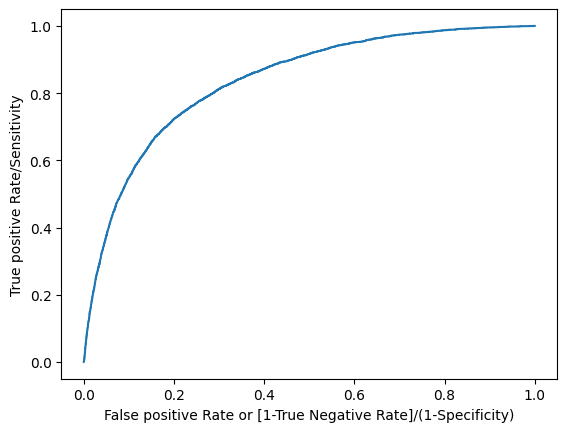

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,_ = roc_curve(Y,Y_proba)


import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False positive Rate or [1-True Negative Rate]/(1-Specificity)')
plt.ylabel('True positive Rate/Sensitivity')
plt.show()


In [ ]:
auc=roc_auc_score(Y,Y_proba)
auc.round(3)

0.837

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.shape


(31647, 9)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_train=logreg.predict(X_train)
Y_pred_tst=logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
auc1=accuracy_score(Y_train,Y_pred_train)
auc1.round(2)

0.89

In [ ]:
auc2=accuracy_score(Y_test,Y_pred_tst)
auc2.round(2)

0.89